# Quantum H2D
- containing dipole measurement of H2O

## Dipole measurement of H2O

In [1]:
# create molecule
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom="O 0.0 0.0 0.0; H 0.757 0.586 0.0; H -0.757 0.586 0.0",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

In [2]:
es_problem

In [3]:
print('Nuclear repulsion energy: {}'.format(es_problem.nuclear_repulsion_energy))
print('Number of molecular orbitals: {}'.format(es_problem.num_spin_orbitals))
print('Number of particles: {}'.format(es_problem.num_particles))

Nuclear repulsion energy: 9.193913160623385
Number of molecular orbitals: 14
Number of particles: (5, 5)


In [4]:
#optimize
from qiskit_nature.second_q.problems import ElectronicStructureProblem
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

#transformer = FreezeCoreTransformer()
#problem = transformer.transform(es_problem)

In [12]:
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer

as_transformer = ActiveSpaceTransformer(4, 4)

problem = as_transformer.transform(es_problem)

In [13]:
print('Nuclear repulsion energy: {}'.format(problem.nuclear_repulsion_energy))
print('Number of molecular orbitals: {}'.format(problem.num_spin_orbitals))
print('Number of particles: {}'.format(problem.num_particles))

Nuclear repulsion energy: 9.193913160623385
Number of molecular orbitals: 8
Number of particles: (2, 2)


In [14]:
# define mapper
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()

In [15]:
# solve with numpy
from qiskit.algorithms.eigensolvers import NumPyEigensolver

numpy_solver = NumPyEigensolver(filter_criterion=es_problem.get_default_filter_criterion())



In [16]:
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import GroundStateEigensolver, QEOM
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

estimator = Estimator()
# This first part sets the ground state solver
# see more about this part in the ground state calculation tutorial
solver = VQE(estimator, ansatz, SLSQP())
solver.initial_point = [0.0] * ansatz.num_parameters
gse = GroundStateEigensolver(mapper, solver)

# The qEOM algorithm is simply instantiated with the chosen ground state solver and Estimator primitive
qeom_excited_states_solver = QEOM(gse, estimator, "sd")

In [17]:
#results
from qiskit_nature.second_q.algorithms import ExcitedStatesEigensolver

numpy_excited_states_solver = ExcitedStatesEigensolver(mapper, numpy_solver)
numpy_results = numpy_excited_states_solver.solve(problem)

qeom_results = qeom_excited_states_solver.solve(problem)

#print(numpy_results)
print("\n\n")
print(qeom_results)




=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -84.164275526938
  - computed part:      -6.163156358785
  - {name} extracted energy part: -78.001119168153
~ Nuclear repulsion energy (Hartree): 9.193913160623
> Total ground state energy (Hartree): -74.970362366315
 
=== EXCITED STATE ENERGIES ===
 
  1: 
* Electronic excited state energy (Hartree): -83.761567517492
> Total excited state energy (Hartree): -74.567654356869
  2: 
* Electronic excited state energy (Hartree): -83.683474430568
> Total excited state energy (Hartree): -74.489561269945
  3: 
* Electronic excited state energy (Hartree): -83.662852274864
> Total excited state energy (Hartree): -74.46893911424
  4: 
* Electronic excited state energy (Hartree): -83.647741963713
> Total excited state energy (Hartree): -74.453828803089
  5: 
* Electronic excited state energy (Hartree): -83.612888238712
> Total excited state energy (Hartree): -74.418975078089
  6: 
* Electronic excited state energy (Hartre

### qiskit calculation

### classical reference data
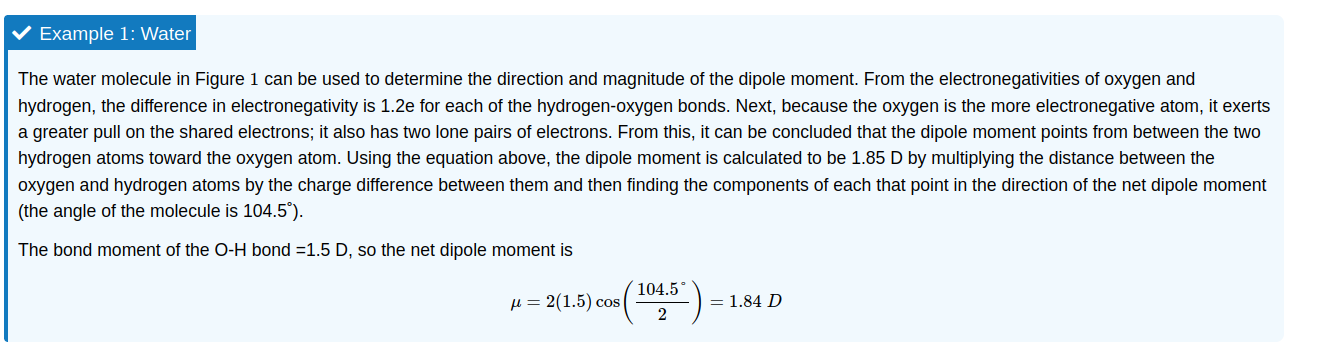

## References
- https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Dipole_Moments
- https://qiskit.org/ecosystem/nature/tutorials/04_excited_states_solvers.html
- https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/chemistry/h2o.ipynb

## qiskit version

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright